In [29]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors, Descriptors
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm

from matplotlib import cm
plasma = cm.get_cmap('plasma', 32)

In [30]:
import seaborn as sns

In [31]:
data1 = pd.read_csv("enamine_enum_props.csv")

data1["source"] = ["enumerated"] * len(data1)

In [32]:
data1_props = data1[list(data1)[4:-1]].copy()

In [33]:
amide_row = np.array(data1[data1.rmat_tag==34093126][list(data1)[4:-1]])

In [34]:
data1_deltas = data1_props-amide_row

In [35]:
data1[['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']] = data1_deltas

In [36]:
data2 = pd.read_csv("enamine_small_props.csv")

In [37]:
data2["source"] = ["small"] * len(data2)

In [38]:
data2_props = data2[list(data2)[4:-1]].copy()

amide_row = np.array(data2[data2.rmat_tag==34093126][list(data2)[4:-1]])

data2_deltas = data2_props-amide_row

In [39]:
data2[['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']] = data2_deltas

In [40]:
data1.head()

,rmat_tag,distance,largest_frag,largest_cleaned,LogP,MW,HBD,HBA,PSA,ROTB,FSP3,SSSR,QED,source
0,40932,7.0,[14C][18O][16C]N1C(=O)c2ccccc2C1=O,COCN1C(=O)c2ccccc2C1=O,-0.3642,-204.277,-3.0,-2.0,-74.57,-5.0,-0.228571,-2.0,0.042515,enumerated
1,40955,7.0,[14C][18O][17C][17O][16C]N1C(=O)c2ccccc2C1=O,COCOCN1C(=O)c2ccccc2C1=O,-0.3901,-174.251,-3.0,-1.0,-65.34,-3.0,-0.155844,-2.0,-0.179767,enumerated
2,40986,13.0,[14C][18O][16C]([17O][15N]=[17C])N1C(=O)c2cccc...,COC(ON=C)N1C(=O)c2ccccc2C1=O,-0.4059,-161.252,-3.0,0.0,-52.98,-3.0,-0.246753,-2.0,-0.274474,enumerated
3,41039,9.0,[14C][18O][15N]([16C]N1C(=O)c2ccccc2C1=O)[17C]...,CON(CN1C(=O)c2ccccc2C1=O)C=O,-0.9908,-161.252,-3.0,-1.0,-54.26,-3.0,-0.246753,-2.0,-0.183870,enumerated
4,41040,7.0,[14C][18O][17C](=[17O])[15N][16C]N1C(=O)c2cccc...,COC(=O)NCN1C(=O)c2ccccc2C1=O,-0.6546,-161.252,-2.0,-1.0,-45.47,-5.0,-0.246753,-2.0,0.150549,enumerated


<Figure size 216x216 with 0 Axes>

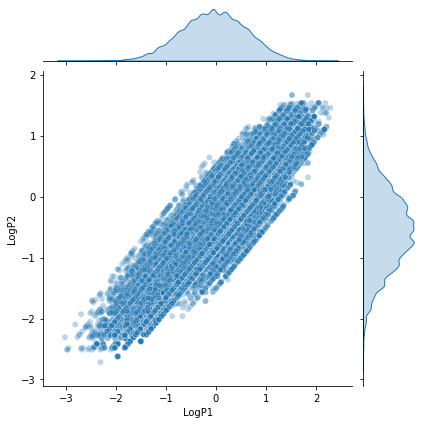

<Figure size 216x216 with 0 Axes>

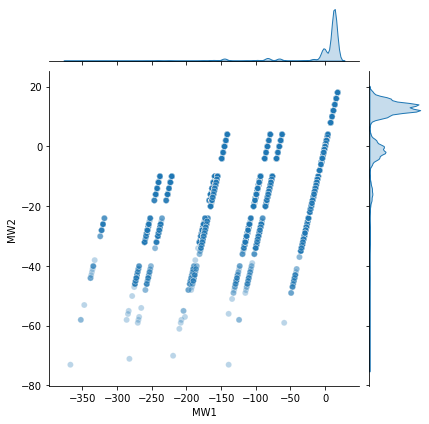

<Figure size 216x216 with 0 Axes>

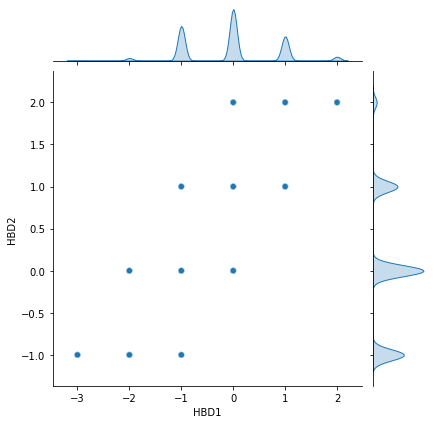

<Figure size 216x216 with 0 Axes>

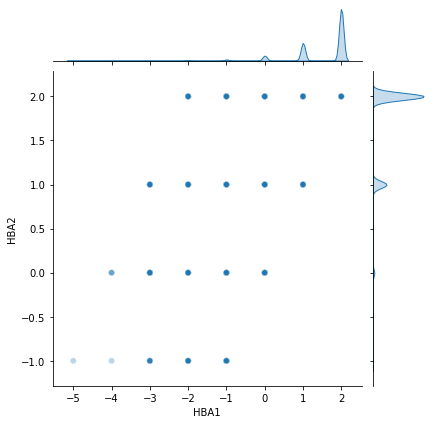

<Figure size 216x216 with 0 Axes>

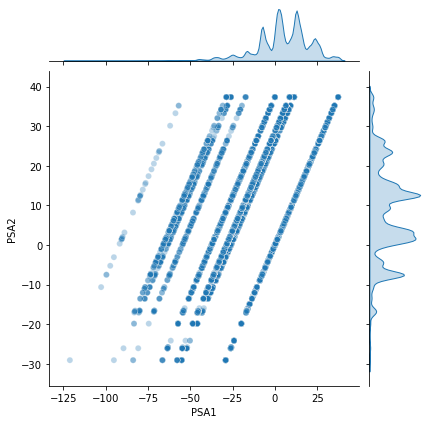

<Figure size 216x216 with 0 Axes>

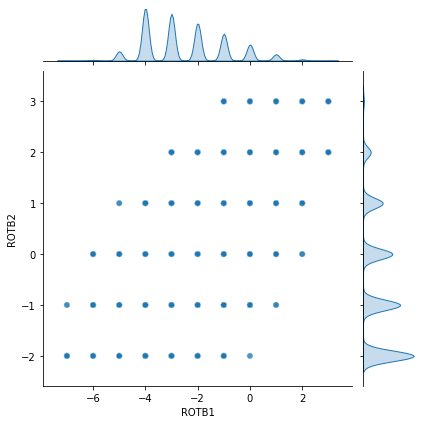

<Figure size 216x216 with 0 Axes>

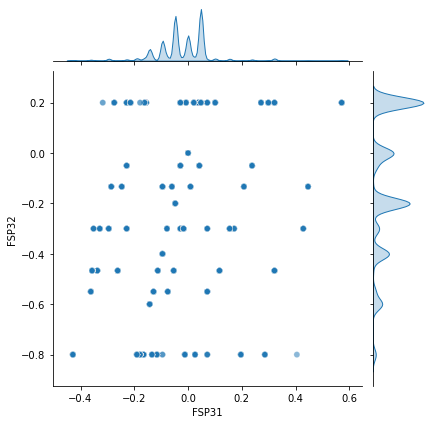

<Figure size 216x216 with 0 Axes>

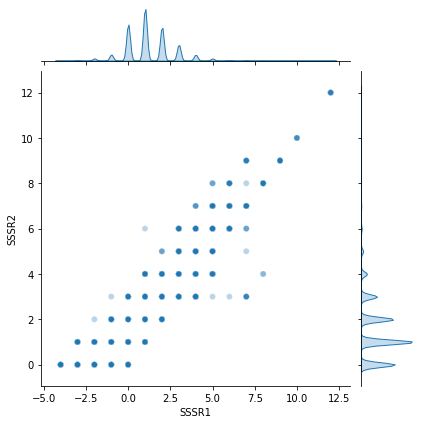

<Figure size 216x216 with 0 Axes>

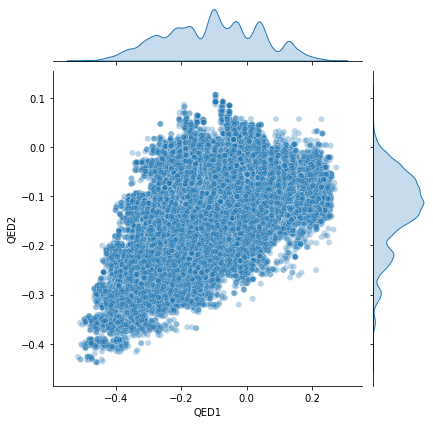

In [43]:
for prop in ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']:

# prop = "HBA"

    new_df = pd.DataFrame()

    new_df = pd.concat((data1[prop], data2[prop],data1["distance"]>6),axis=1)
    new_df.columns=(f"{prop}1",f"{prop}2","distance")
    new_df["distance"] = ["foo"]*len(new_df)

    df_short = new_df.iloc[::10]
    
    plt.figure(figsize=(3,3))

    g = sns.jointplot(data=df_short,x=f"{prop}1",y=f"{prop}2",hue="distance",legend=False,alpha=0.3)
    
    pass
#     ax1 = sns.jointplot(x=x, y=y)
#     g.ax_joint.cla()
#     plt.sca(g.ax_joint)

#     plt.hist2d(df_short[f"{prop}1"],df_short[f"{prop}2"], bins=(100, 100), cmap="plasma",cmin=1);


In [42]:
penguins = sns.load_dataset("penguins")

In [ ]:
data1_melt = pd.melt(data1,id_vars=["source"],value_vars = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED'])

data2_melt = pd.melt(data2,id_vars=["source"],value_vars = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED'])

data_both = pd.concat((data1_melt,data2_melt))

In [ ]:
data_both.head()

In [ ]:
data_both.reset_index(drop=True,inplace=True)

data1_melt = []
data2_melt = []

In [ ]:
output = data_both

output.reset_index(drop=True,inplace=True)

# plot_props = ["logP","ROTB"]
# output_plot = output[output.property.isin(plot_props)]
# output_plot.head(3)

output_plot = output
plot_props = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']



In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)},font_scale=1.5)
g = sns.FacetGrid(output_plot,col = "variable",hue="source",
                  aspect=1,height=1.16798*3,col_wrap=3,
                  sharex=False,sharey=False,palette="plasma")

g.map(sns.kdeplot, "value",clip_on=True,shade=True,bw_method=0.2);
# g.map(sns.distplot, "value");
g.set(yticks=[])
# g.set(xticks=[0.0,1.0])
g.despine(top=False, right=False)
# titles = props

for i, ax in enumerate(g.axes.flat): # set every-other axis for testing purposes
    title = plot_props[i]
    
    ax.set_title(title, fontweight='bold',fontsize=15)
# #     ax.set_xticklabels([round(i,2) for i in main_minmax[title]],rotation=45,fontsize=10)
#     ax.set_xticklabels([round(minmax_dict[title][0],2),round(minmax_dict[title][-1],2)])
#     ax.set_xlim(-.5,1.5)
#     ax.axvline(amide_line[i], color=plasma(0), linewidth=2)
#     ax.axvline(data_means_interp[i][0], color=plasma(0.25)) # original
#     ax.axvline(data_means_interp[i][1], color=plasma(0.75)) # enumerated
g.add_legend()
g.set_xlabels("")
plt.subplots_adjust(top=0.9)
# g.fig.suptitle(plot_title,fontweight='bold',fontsize=25)
g.savefig("ridgeplot_enamine.png")

In [ ]:
prop = "MW"

In [ ]:
lims

In [ ]:
plt.hist2d(data1[prop],data2[prop],cmap="viridis",bins=200)
ax = plt.gca()
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'w-', alpha=0.75)
plt.colorbar()
pass

In [ ]:
molprops =  ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

fig,axs = plt.subplots(3,3)

for i, ax in enumerate(fig.axes):
    print(i)
    ax.scatter(data1[molprops[i]],data2[molprops[i]],alpha=0.5)
#         ax = plt.gca()

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.tick_params(axis='both', which='major', labelsize=13)
#     ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.axvline(c='k',alpha=0.75)
    ax.axhline(c='k',alpha=0.75)
#     plt.xlabel("Finasteride")
#     plt.ylabel("Simple system")
    ax.set_title(molprops[i],fontsize=15)
plt.tight_layout()

In [ ]:
molprops =  ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

fig,axs = plt.subplots(3,3)

for i, ax in enumerate(fig.axes):
    print(i)
    ax.hist2d(data1[molprops[i]],data2[molprops[i]],cmap="viridis",bins=50)
#         ax = plt.gca()

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.tick_params(axis='both', which='major', labelsize=13)
#     ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.axvline(c='k',alpha=0.75)
    ax.axhline(c='k',alpha=0.75)
#     plt.xlabel("Finasteride")
#     plt.ylabel("Simple system")
    ax.set_title(molprops[i],fontsize=15)
plt.tight_layout()